<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Extra Tree Classifier With Normalization

This Code template demonstrates the Classification tasks using a simple ExtraTreesClassifier based on the Extremely randomized trees algorithm, and data normalization is performed using the sci-kit learn's Normalize.

### Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as se
import warnings
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,plot_confusion_matrix 
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [ ]:
#filepath
file_path= ""

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


List of features which are  required for model training .

In [ ]:
#x_values
features=[]

Target feature for prediction.

In [ ]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [ ]:
df=pd.read_csv(file_path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [ ]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [ ]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [ ]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

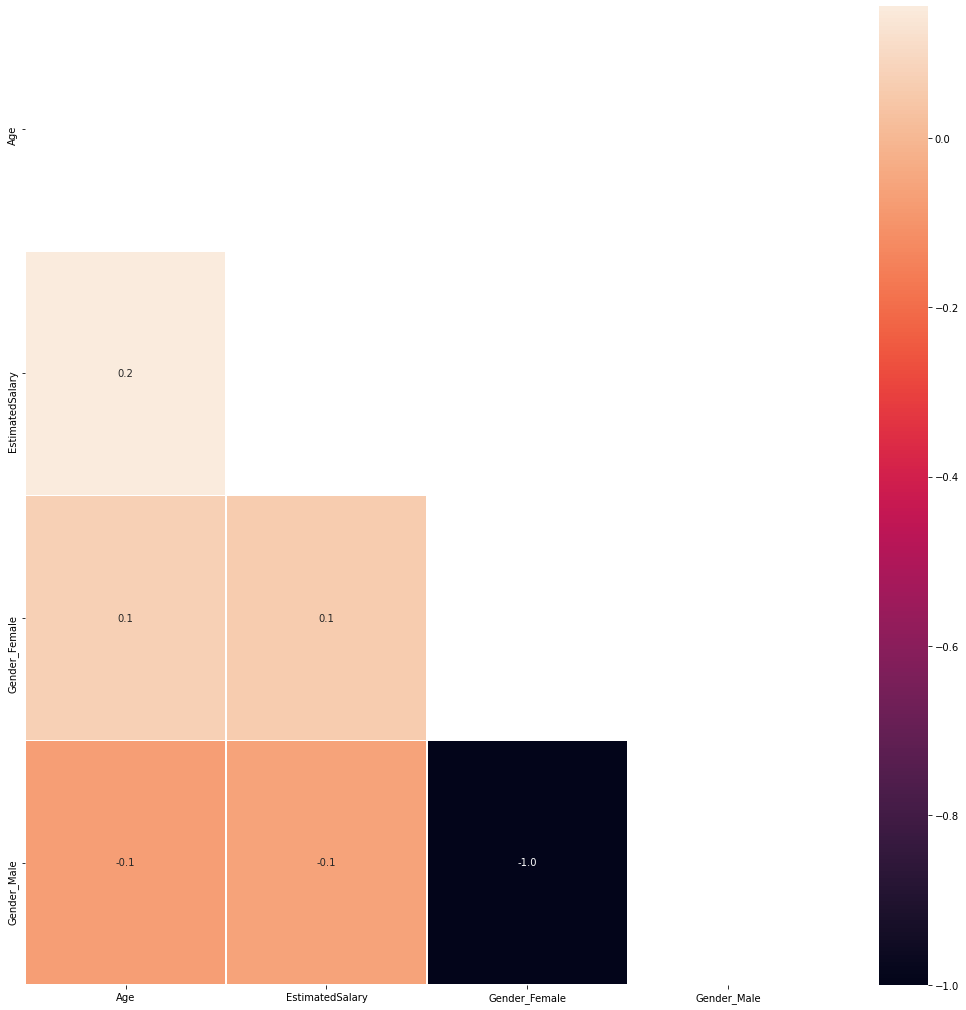

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### Distribution Of Target Variable

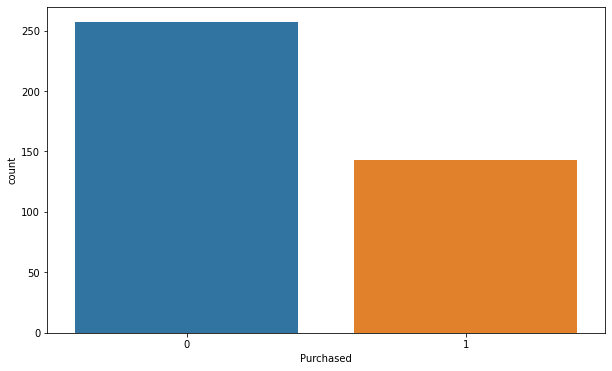

In [ ]:
plt.figure(figsize = (10,6))
se.countplot(Y)

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

### Data Rescaling
Normalize samples individually to unit norm.
Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.
This transformer is able to work both with dense numpy arrays and scipy.sparse matrix.

In [ ]:
normalize = Normalizer()
X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)

### Model
ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees. ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting.

#### Model Tuning Parameters

    1.n_estimators:int, default=100
>The number of trees in the forest. 

    2.criterion:{“gini, “entropy}, default="gini"
>The function to measure the quality of a split. Supported criteria are “gini for the Gini impurity and “entropy for the information gain.
  
    3.max_depth:int, default=None
>The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
   
    
    4.max_features:{“auto, “sqrt, “log2}, int or float, default=auto
>The number of features to consider when looking for the best split:

In [ ]:
model=ExtraTreesClassifier(n_jobs = -1,random_state = 123)
model.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

#### Model Accuracy

score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 83.75 %



#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

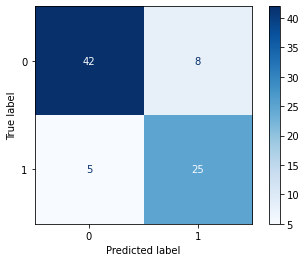

In [ ]:
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues)

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [ ]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87        50
           1       0.76      0.83      0.79        30

    accuracy                           0.84        80
   macro avg       0.83      0.84      0.83        80
weighted avg       0.84      0.84      0.84        80



#### Feature Importances.

The Feature importance refers to techniques that assign a score to features based on how useful they are for making the prediction.

(-1.0, 4.0)

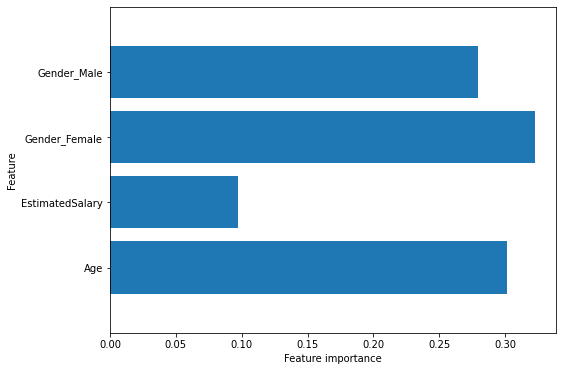

In [ ]:
plt.figure(figsize=(8,6))
n_features = len(X.columns)
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

#### Creator: Ayush Gupta , Github: [Profile](https://github.com/guptayush179)